In [3]:
#coursework for football analysis code attempt 2
import pandas as pd
import numpy as ny


In [4]:
data = pd.read_csv("data to use for dissertation final version.csv")

C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Most Important Features for Hybrid Model 1 (Gradient Boosting + Random Forest):
num__Dribbling / Reflexes: 0.3072
num__Base stats: 0.2287
num__Age: 0.0816
num__Total defending: 0.0772
num__Total movement: 0.0380
num__Shooting / Handling: 0.0302
num__Total power: 0.0216
num__Defending / Pace: 0.0213
num__International reputation: 0.0175
num__Growth: 0.0171

Most Important Features for Hybrid Model 2 (Multilinear Regression + Gradient Boosting):
cat__Ball control_92: 4559796.3070
cat__Reactions_89: 4482830.6978
cat__Agility_93: 4326049.6918
cat__Wage_€230K: 4149576.0856
cat__Long passing_86: 3874503.6322
cat__Release clause_€356.1M: 3702084.4743
cat__Reactions_94: 3702084.4719
cat__name_E. Haaland ST: 3702084.4710
cat__Finishing_96: 3702084.4710
num__Age: 3685113.4721

Most Important Features for Hybrid Model 3 (Neural Network + Random Forest):
num__Dribbling / Reflexes: 0.1368
num__Base stats: 0.1349
num__Total defending: 0.0316
num__Age: 0.0304
num__Total movement: 0.0195
num__Shootin

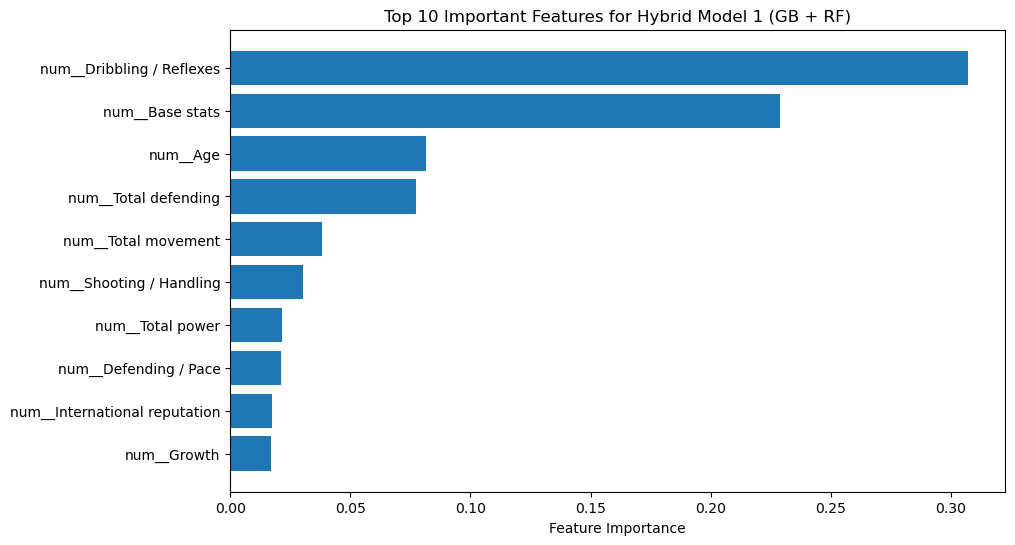

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

data = data.drop(["ID", "Overall rating", "Potential", "Best overall"], axis=1)

# Function to convert monetary strings to numeric values
def convert_money_to_float(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace(',', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3
        else:
            return float(value)
    return value

# Apply the conversion function to the target variable
data['Value'] = data['Value'].apply(convert_money_to_float)

# Separate features and target variable
X = data.drop(columns=['Value'])  # Replace 'Value' with your target variable name if different
y = data['Value']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocess the data: Standardize numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply transformations
X_transformed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train Gradient Boosting and Random Forest for Hybrid Model 1
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Feature importances from both models
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_
average_importance_1 = (rf_importances + gb_importances) / 2

# Train Gradient Boosting and Multilinear Regression for Hybrid Model 2
gb_model.fit(X_train, y_train)
# Multilinear regression doesn't provide feature importance directly, but we can use the coefficients
lr_model.fit(X_train, y_train)
lr_importances = np.abs(lr_model.coef_)
average_importance_2 = (gb_importances + lr_importances) / 2

# Train Neural Network and Random Forest for Hybrid Model 3
nn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
# Neural Networks don't provide feature importances directly
average_importance_3 = (rf_importances + np.zeros_like(rf_importances)) / 2

# Display the most important features for each hybrid model
def display_top_features(importance_scores, model_name):
    important_features = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)
    print(f"\nMost Important Features for {model_name}:")
    for feature, importance in important_features[:10]:  # Display top 10 features
        print(f"{feature}: {importance:.4f}")

# Show top features for each hybrid model
display_top_features(average_importance_1, "Hybrid Model 1 (Gradient Boosting + Random Forest)")
display_top_features(average_importance_2, "Hybrid Model 2 (Multilinear Regression + Gradient Boosting)")
display_top_features(average_importance_3, "Hybrid Model 3 (Neural Network + Random Forest)")

# Plot the top 10 important features for Hybrid Model 1
top_features_1 = sorted(zip(feature_names, average_importance_1), key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in top_features_1], [x[1] for x in top_features_1])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Hybrid Model 1 (GB + RF)")
plt.show()

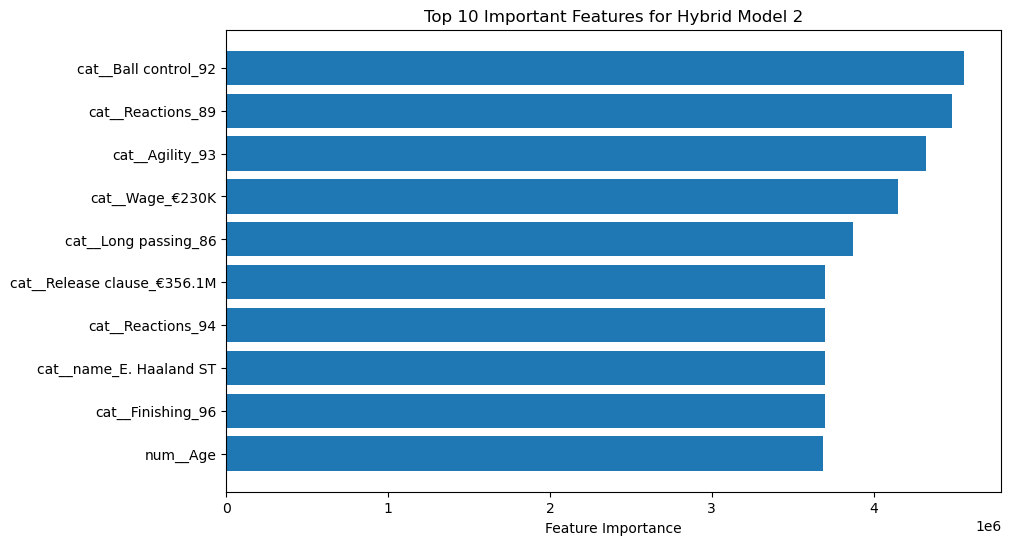

In [16]:
# Plot the top 10 important features for Hybrid Model 2
top_features_2 = sorted(zip(feature_names, average_importance_2), key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in top_features_2], [x[1] for x in top_features_2])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Hybrid Model 2")
plt.show()

Text(0.5, 1.0, 'Top 10 Important Features for Hybrid Model 3')

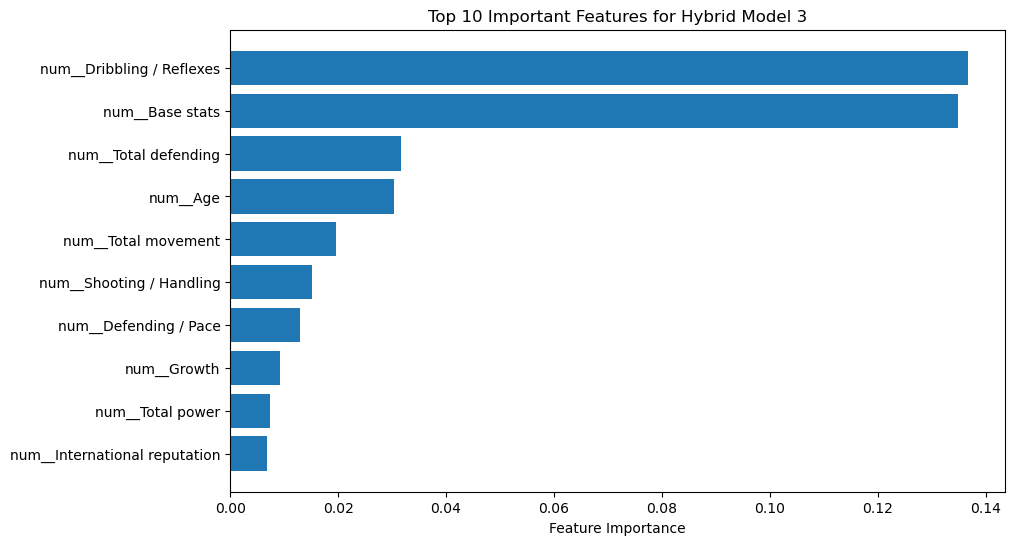

In [17]:
# Plot the top 10 important features for Hybrid Model 2
top_features_3 = sorted(zip(feature_names, average_importance_3), key=lambda x: x[1], reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in top_features_3], [x[1] for x in top_features_3])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Hybrid Model 3")

In [18]:

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report

# Function to calculate regression metrics: RMSE and R²
def calculate_regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Predictions for each hybrid model
# Hybrid Model 1: Gradient Boosting + Random Forest
y_pred_hybrid1 = (gb_model.predict(X_test) + rf_model.predict(X_test)) / 2
rmse_hybrid1, r2_hybrid1 = calculate_regression_metrics(y_test, y_pred_hybrid1)

# Hybrid Model 2: Multilinear Regression + Gradient Boosting
y_pred_hybrid2 = (lr_model.predict(X_test) + gb_model.predict(X_test)) / 2
rmse_hybrid2, r2_hybrid2 = calculate_regression_metrics(y_test, y_pred_hybrid2)

# Hybrid Model 3: Neural Network + Random Forest
y_pred_hybrid3 = (nn_model.predict(X_test) + rf_model.predict(X_test)) / 2
rmse_hybrid3, r2_hybrid3 = calculate_regression_metrics(y_test, y_pred_hybrid3)

# If you want to calculate classification metrics, you would need to binarize or categorize the target variable
# Here is an example if you have binary or categorical outcomes (customize as needed):
y_pred_class = np.where(y_pred_hybrid1 > np.median(y_test), 1, 0)  # Example thresholding
y_test_class = np.where(y_test > np.median(y_test), 1, 0)  # Example thresholding for binary classification

# Calculate classification metrics for Hybrid Model 1
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)

# Output the results
print("Performance Metrics for Hybrid Models:")
print(f"Hybrid Model 1 (GB + RF): RMSE = {rmse_hybrid1:.2f}, R² = {r2_hybrid1:.2f}")
print(f"Hybrid Model 2 (LR + GB): RMSE = {rmse_hybrid2:.2f}, R² = {r2_hybrid2:.2f}")
print(f"Hybrid Model 3 (NN + RF): RMSE = {rmse_hybrid3:.2f}, R² = {r2_hybrid3:.2f}\n")

# Output classification metrics for Hybrid Model 1 (if applicable)
print("Classification Metrics for Hybrid Model 1 (Example):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", report)

Performance Metrics for Hybrid Models:
Hybrid Model 1 (GB + RF): RMSE = 6431637.04, R² = 0.87
Hybrid Model 2 (LR + GB): RMSE = 6740053.64, R² = 0.85
Hybrid Model 3 (NN + RF): RMSE = 13096728.81, R² = 0.45

Classification Metrics for Hybrid Model 1 (Example):
Accuracy: 0.92
Precision: 0.89
Recall: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       474
           1       0.89      0.95      0.92       462

    accuracy                           0.92       936
   macro avg       0.92      0.92      0.92       936
weighted avg       0.92      0.92      0.92       936

